In [93]:
# Import packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from collections import Counter
from parse import preprocess

In [94]:
# Function to show classification report for Cross Validation
def classification_report_with_accuracy_score(y_true, y_pred):
    print(classification_report(y_true, y_pred)) # print classification report
    return accuracy_score(y_true, y_pred) # return accuracy score

In [95]:
# Pre-parse the dataset
data = preprocess("rawfile_blood.csv")


####################################################################
Number of Rows of Dataframe:
1123
Number of Columns of Dataframe:
59

####################################################################
Threshold for number of NULLs in a column: 0.1095
Number of Columns before Parsing for Too Many NULLs in a column:
59
Number of Columns after Parsing for Too Many NULLs in a column:
51

Columns Removed:
B1_b5
B4_a1
B4_a3
B4_a4
B4_a6
B4_b1
B4_b3
B5_a1

####################################################################
Number of Rows before Parsing NULLs in data:
1123
Number of Rows after Parsing NULLs in data:
1007

####################################################################
Number of Columns after dropping A1_2, B1_b4, B2_c3, B4_b2 for inconsistent data types:
47


In [96]:
c = data['condition'].value_counts()
condition = c.index
c

robust          339
prefrail_mci    231
prefrail        221
mci             133
frail_mci        76
frail             7
Name: condition, dtype: int64

In [97]:
for i in range(len(condition)):
    data['condition'].replace(condition[i], i, inplace = True)

c = data['condition'].value_counts()
c

0    339
1    231
2    221
3    133
4     76
5      7
Name: condition, dtype: int64

In [98]:
y = data['condition']

features = ['A1_1', 'A2_1', 'A3_1', 'B1_a', 'B1_a1', 'B1_a2',
       'B1_a3', 'B1_a4', 'B1_a5', 'B1_a6', 'B1_b', 'B1_b1', 'B1_b2', 'B1_b3',
       'B1_c', 'B1_d', 'B2_a1', 'B2_a2', 'B2_a3', 'B2_a4', 'B2_a5', 'B2_b1',
       'B2_b2', 'B2_b3', 'B2_c1', 'B2_c2', 'B2_c4', 'B2_c5', 'B2_c6', 'B2_c7',
       'B2_d1', 'B2_d2', 'B2_d3', 'B2_d4', 'B2_d5', 'B2_d6', 'B2_d7', 'B2_d8',
       'B2_d9', 'B3', 'B4_a2', 'B4_a5', 'B5_a2', 'B5_a3', 'B6']
X = data[features]

In [99]:
X.var()

A1_1     38284.192365
A2_1        40.138916
A3_1       375.438057
B1_a       294.149273
B1_a1        0.295864
B1_a2        0.001616
B1_a3       46.924805
B1_a4        6.328279
B1_a5      148.022503
B1_a6        1.232752
B1_b        23.354421
B1_b1        2.969479
B1_b2        0.522250
B1_b3        0.073550
B1_c      3781.593847
B1_d         3.250442
B2_a1        1.158587
B2_a2        0.397148
B2_a3        0.216781
B2_a4        0.853026
B2_a5        1.016488
B2_b1        5.972126
B2_b2        0.193699
B2_b3        6.825196
B2_c1        3.669005
B2_c2     1033.843426
B2_c4        0.008175
B2_c5        0.009174
B2_c6        0.005457
B2_c7        0.024566
B2_d1       21.897682
B2_d2        7.730554
B2_d3       16.269495
B2_d4        0.037773
B2_d5      500.767895
B2_d6       27.958809
B2_d7      906.344554
B2_d8       79.171533
B2_d9      176.193494
B3          39.017181
B4_a2        0.577496
B4_a5        0.000043
B5_a2       10.759163
B5_a3        0.321788
B6           1.512388
dtype: flo

In [100]:
A = X.var()

In [101]:
# Transform the dataset using SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

# Summarise the new class distribution
counter = Counter(y)
print(counter)

Counter({5: 339, 4: 339, 3: 339, 1: 339, 2: 339, 0: 339})


In [102]:
X.var()

A1_1     33035.568836
A2_1        30.113980
A3_1       333.173382
B1_a       261.087071
B1_a1        0.235484
B1_a2        0.001321
B1_a3       36.013940
B1_a4        4.600614
B1_a5      116.219844
B1_a6        0.957311
B1_b        16.157072
B1_b1        2.222886
B1_b2        0.758839
B1_b3        0.074776
B1_c      2928.396141
B1_d         2.469260
B2_a1        0.963685
B2_a2        0.338153
B2_a3        0.177861
B2_a4        0.704283
B2_a5        0.810493
B2_b1        4.566224
B2_b2        0.172754
B2_b3        5.952401
B2_c1        3.416980
B2_c2      825.915491
B2_c4        0.007241
B2_c5        0.006936
B2_c6        0.004205
B2_c7        0.021729
B2_d1       17.498275
B2_d2        6.186732
B2_d3       12.407299
B2_d4        0.028097
B2_d5      413.036467
B2_d6       24.249307
B2_d7      603.115756
B2_d8       57.409828
B2_d9      137.641347
B3          29.899293
B4_a2        0.444843
B4_a5        0.000032
B5_a2       11.541373
B5_a3        0.286429
B6           2.197598
dtype: flo

In [103]:
B = X.var()

In [104]:
varianceDF = pd.concat([A, B], axis = 1)
varianceDF = varianceDF.rename(columns={0: 'Before SMOTE', 1: 'After SMOTE'})
varianceDF

,Before SMOTE,After SMOTE
A1_1,38284.192365,33035.568836
A2_1,40.138916,30.113980
A3_1,375.438057,333.173382
B1_a,294.149273,261.087071
B1_a1,0.295864,0.235484
B1_a2,0.001616,0.001321
B1_a3,46.924805,36.013940
B1_a4,6.328279,4.600614
B1_a5,148.022503,116.219844
B1_a6,1.232752,0.957311


In [105]:
C = A - B

D = (1 - (B / A)) * 100

varianceDF['Before-After (Difference)'] = C
varianceDF['Percentage Decrease (%)'] = D

varianceDF

,Before SMOTE,After SMOTE,Before-After (Difference),Percentage Decrease (%)
A1_1,38284.192365,33035.568836,5248.623529,13.709636
A2_1,40.138916,30.113980,10.024936,24.975603
A3_1,375.438057,333.173382,42.264675,11.257430
B1_a,294.149273,261.087071,33.062202,11.239940
B1_a1,0.295864,0.235484,0.060380,20.408039
B1_a2,0.001616,0.001321,0.000295,18.267550
B1_a3,46.924805,36.013940,10.910865,23.251806
B1_a4,6.328279,4.600614,1.727665,27.300704
B1_a5,148.022503,116.219844,31.802659,21.485016
B1_a6,1.232752,0.957311,0.275441,22.343592


Text(0.5, 1.0, 'Percentage Decrease (%) in Variance for each Feature')

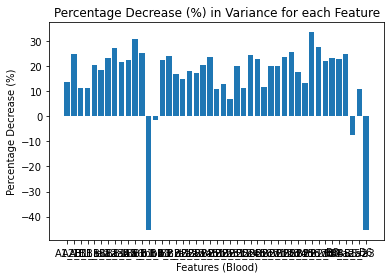

In [108]:
import matplotlib.pyplot as plt

plt.bar(D.index, D)
plt.ylabel('Percentage Decrease (%)')
plt.xlabel('Features (Blood)')
plt.title('Percentage Decrease (%) in Variance for each Feature')